# To Sherlin

im still hving a little doubt on my last question, think i could miss sth, can u please provide as much info as u can? thanks!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
print(df.info())
df.head()

##numeric data needs removing outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
smoker = df.loc[df['smoker'] == 'yes'].copy()
non_smoker = df.loc[df['smoker'] == 'no'].copy()

In [3]:
smoker_charge=smoker['charges']
non_smoker_charge=non_smoker['charges']

# Q1. Do smokers have higher insurance charges than non-smokers?


## State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: No difference on price between smokers and non smokers.

- Alternative Hypothesis: There is difference on price between smokers and non smokers.

## Select the correct test according to the data type and number of samples

it is a two sample numeric data, so I will perform independent t test.


## Test the assumptions of your selected test.

There are three assumptions:
 - No significant outliers
 - Normality
 - Equal Variance

In [4]:
# Check for outliers for both groups
##smoker_charge
smoker_zscores= stats.zscore(smoker_charge)
smoker_outliers = abs(smoker_zscores)>3
print((np.sum(smoker_outliers)))
# remove outliers from strength group
smoker_charge = smoker_charge[(np.abs(smoker_zscores) < 3)]

0


In [5]:
##non_smoker_charge
non_smoker_zscores= stats.zscore(non_smoker_charge)
non_smoker_outliers = abs(non_smoker_zscores)>3
print((np.sum(non_smoker_outliers)))
# remove outliers from strength group
non_smoker_charge = non_smoker_charge[(np.abs(non_smoker_zscores) < 3)]

24


In [6]:
# test the strength group for normality
result_smoker_charge= stats.normaltest(smoker_charge)
result_non_smoker_charge = stats.normaltest(non_smoker_charge)

print(result_smoker_charge)
print(result_non_smoker_charge)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


In [7]:
# check for equal variance
# Test for equal variance
result = stats.ttest_ind(smoker_charge, non_smoker_charge)
result

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)

result suggest we don't have equal variances, so we just need to be sure to include "equal_var = False" when we perform our t-test.

## Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [8]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charge, non_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## Interpret your p-value and reject or fail to reject your null hypothesis 


Our p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference on price between smokers and non smokers.

## Show a supporting visualization that helps display the result

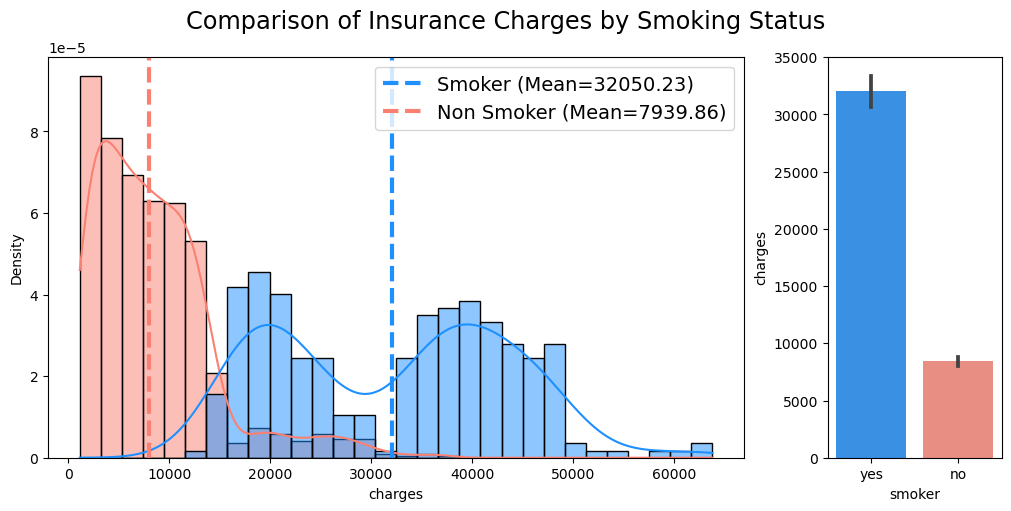

In [9]:
smoke_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoke_palette)

ax.axvline(np.mean(smoker_charge), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(smoker_charge):.2f})",color=smoke_palette['yes'])

ax.axvline(np.mean(non_smoker_charge), ls='--', lw=3, 
           label=f"Non Smoker (Mean={np.mean(non_smoker_charge):.2f})",color=smoke_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoke_palette)
fig.suptitle('Comparison of Insurance Charges by Smoking Status',fontsize='xx-large');

# Q2. Are men more likely to smoke than women?

## State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: theres no difference on smoking habits between men and women

- Alternative Hypothesis: theres difference on smoking habits between men and women

## Select the correct test according to the data type and number of samples

it is a two sample categorical data, so I will perform chi square test.


## Test the assumptions of your selected test.

 - There are two categorical variables (men and women) as both of them are nominal
 - The outcomes are independent.


## Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [10]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [11]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

## Interpret your p-value and reject or fail to reject your null hypothesis 


p value is less than 0.05, so we will reject the null hypothesis and come to the conclusion that theres difference on smoking habits between men and women.

## Show a supporting visualization that helps display the result

Text(0.5, 1.0, 'Number of Smokers by sex')

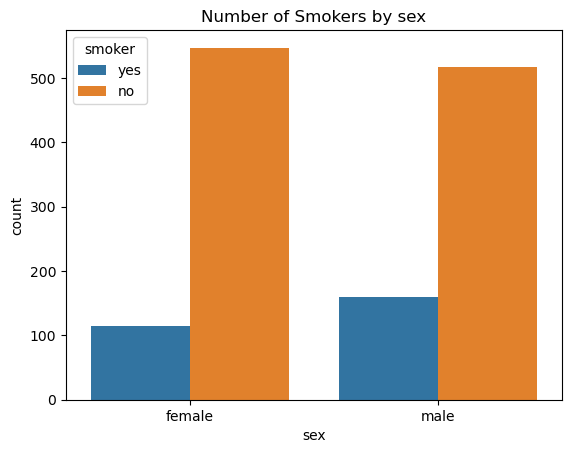

In [12]:
ax=sns.countplot(data=df, x='sex', hue = 'smoker')
ax.set_title('Number of Smokers by sex')

# Q3. Do different regions have different charges, on average?

## State your Null Hypothesis and Alternative Hypothesis


- Null Hypothesis: different regions do not have the different charges in average.

- Alternative Hypothesis: different regions have different charges in average.

## Select the correct test according to the data type and number of samples

From code below, we can tell there are 4 regions in this data, so it is a multiple group numeric data and I will perform ANOVA test.


## Test the assumptions of your selected test.
ANOVA Assumptions(One Way ANOVA)

- Normality
- Equal variance
- No significant outliers

In [13]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for region in df['region'].unique():
    ## Get series for groups
    data = df.loc[df['region']== region,'charges'].copy()
    
    # save into the dictionary
    groups[region] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [14]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for region, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[region] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


We confirm that each group does not meet the normality since p values are less than .05. However, since there are a lot more than 20 datas at each group, we determine to still move on to next step 

In [15]:
# check equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

The result does not meet the assumption of equal variance.

## Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [16]:
#try one way anova
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [17]:
# make dataframe of regions and charges
tukeys_df = pd.DataFrame(columns = ['region', 'charges'])

# convert dictionary groups into df (outliers were deleted
# from dictionary)
for region, series in groups.items():
    values = pd.Series(series.tolist())
    tukeys_df = pd.concat([tukeys_df, pd.DataFrame(
        {'region': [region] * len(values), 
         'charges': values})], ignore_index = False)
    
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


## Interpret your p-value and reject or fail to reject your null hypothesis 


- from one way anova, we will reject the null hypothesis since p value is less than .05.

- there is a reject between southeast and southwest

## Show a supporting visualization that helps display the result

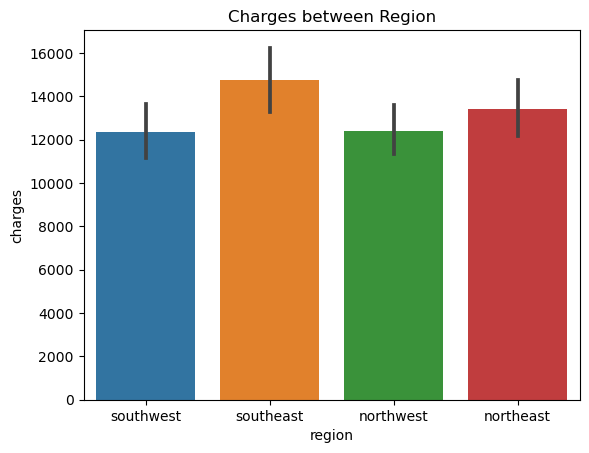

In [18]:
# barplot to compare charges between regions
ax = sns.barplot(data = df, x = 'region', y = 'charges')
ax.set_title('Charges between Region');